In [215]:
import pandas as pd
import seaborn as sns
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from numpy import linalg as LA
import seaborn as sns
import random as random
import math
import time

from sklearn.linear_model import Perceptron
import matplotlib.patches as mpatches
from scipy.optimize import curve_fit
from networkx.drawing.nx_agraph import graphviz_layout
import operator



In [151]:
def gen_ppm(N, B, avg_k, T):
    #def gen_ppm(N, L, B):
    #N = 1000
    L = avg_k*N #5000
    #B=200
    #s = [1]*B + [0]*(N-B)

    D = nx.DiGraph()
    D.add_nodes_from(range(B))

    #introduce all the N-B nodes into the graph, attach them randomly to the nodes already present

    for i in range(B,N):
        #choose the node randomly from the current graph
        j = random.choice(list(D.nodes))
        D.add_node(i)
        D.add_edge(j,i)
        #s[i]=s[j]+1 #update the s values
       # if j in range(B): #if j belongs to basal nodes 
       #     s[i] = s[j]+1
       # else:
       #     s[i] = 1 + 

    # place the remaining (L-N+B) edges, according to gaussian probability

    # make a list of all possible edges possible except basal nodes predating on others
    all_edges = []

    #from non-basal node to another non basal node
    for i in range(B,N):
        for j in range(B,N):
            if i==j: #no self loops
                pass
            else:
                all_edges.append((i,j))

    #from basal node to non basal node
    for i in range(B):
        for j in range(B,N):
            all_edges.append((i,j)) #i--->j
    #T=1 # fix temperature. It is related to q
        
    #edge_count = 0
    while D.number_of_edges()!= int(L):
    #while edge_count!= int(L-N+B):
    
        s = nx.trophic_levels(D) #recompute s values after the edge was added in previous iteration

        # compute normalization factor
        #norm_factor = 0
        #for index, tup in enumerate(all_edges):
        #    i = tup[0]
        #    j = tup[1]
        #    x_ij = s[i]-s[j]
        #    norm_factor += np.exp( -((x_ij-1)**2)/(2*T**2) )

        #choose a random edge uniformly from all edges
        i,j = random.choice(all_edges)

        #i,j = ij[0],ij[1]
        #s = nx.trophic_levels(D) #recompute s values after the edge was added in previous iteration
        # j is always the non basal node, i can be basal as well as non basal node
        x_ji = s[j]-s[i] # subtract always non basal and basal, not the other way around. 

        #probability of connection from i to j
        P_ij = np.exp( -((x_ji-1)**2)/(2*T**2) )#/norm_factor
        if random.random() < P_ij:
            D.add_edge(i,j)
            # if the edge gets added to the graph, 
            #then remove the edge from the all edges list to avoid having multiple parallel edges
            all_edges.remove((i,j)) 
            #edge_count+=1
            #print(edge_count)
            #print(D.number_of_edges())
    return D, N, B, avg_k, T

    
        

# below way of plotting graphs are not good. It was done manually without DOT algorithm

In [84]:

def plot_trophic_level_graph(*params):
    D=params[0]
    N=params[1]
    B=params[2]
    avg_k=params[3]
    T=params[4]
    q=nx.trophic_incoherence_parameter(D)
    
    s = nx.trophic_levels(D)
    s_vals = np.round(list(s.values()),2)
    s_counts = Counter(s_vals)
    initialpos = {}

    for key in s_counts.keys():
        x_axis = list(np.round(np.linspace(-2,2,s_counts[key]),4))
        #ind = 0
        for i in s.keys():
            if np.round(s[i],2)==key:
                select_mid_x = x_axis[int(len(x_axis)/2)] 
                #mid_val = np.median(np.array(x_axis))
                initialpos[i]=(select_mid_x,key)#(x_axis[ind],key)
                #print(x_axis, select_mid_x)
                x_axis.remove(select_mid_x)
                
                #ind+=1
    #pos = nx.spring_layout(D, pos = initialpos)
    x=np.array(list(s.values()))
    normalized = (x-min(x))/(max(x)-min(x))

    fig, ax = plt.subplots(figsize=(12,8))
    nx.draw_networkx(D,initialpos,node_color=normalized,node_size=500,cmap=plt.cm.rainbow,ax=ax)
    ax.tick_params(left=True, bottom=False, labelleft=True, labelbottom=False)
    ax.set_ylabel("S",size=16)
    ax.set_title("Generalised Preferential-Prey model simulation\nN = %d; B = %d; <k> = %d; T = %.3f; q = %.2f"%(N, B, avg_k, T,q),size=14)
    plt.show()

In [149]:

def plot_trophic_level_graph2(*params):
    D=params[0]
    N=params[1]
    B=params[2]
    avg_k=params[3]
    T=params[4]
    q=nx.trophic_incoherence_parameter(D)
    
    s = nx.trophic_levels(D)
    s_vals = np.round(list(s.values()),2)
    s_counts = Counter(s_vals)
    initialpos = {}

    for key in s_counts.keys():
        end_point=2
        x_axis = list(np.round(np.linspace(-end_point,end_point,s_counts[key]),4))
        if len(x_axis)<=int(B/2)+1:
            x_axis = list(np.round(np.linspace(-end_point/2,end_point/2,s_counts[key]),4))
        if len(x_axis)==1:
            x_axis = [random.choice(list(np.round(np.linspace(-end_point,end_point,10),4)))]
        
        #ind = 0
        for i in s.keys():
            if np.round(s[i],2)==key:
                select_mid_x = x_axis[int(len(x_axis)/2)] 
                #mid_val = np.median(np.array(x_axis))
            
                initialpos[i]=(select_mid_x,key)#(x_axis[ind],key)
                #print(x_axis, select_mid_x)
                x_axis.remove(select_mid_x)
                
                #ind+=1
    #pos = nx.spring_layout(D, pos = initialpos)
    x=np.array(list(s.values()))
    normalized = (x-min(x))/(max(x)-min(x))

    fig, ax = plt.subplots(figsize=(12,8))
    nx.draw_networkx(D,initialpos,node_color=normalized,node_size=500,cmap=plt.cm.rainbow,ax=ax)
    ax.tick_params(left=True, bottom=False, labelleft=True, labelbottom=False)
    ax.set_ylabel("S",size=16)
    ax.set_title("Generalised Preferential-Prey model simulation\nN = %d; B = %d; <k> = %d; T = %.3f; q = %.2f"%(N, B, avg_k, T,q),size=14)
    plt.savefig("ppm_T_"+str(T)+".png")
    plt.show()
    #plt.savefig("ppm_T_%.3f.png"%T)
    

In [87]:
0-1+2-3

-2

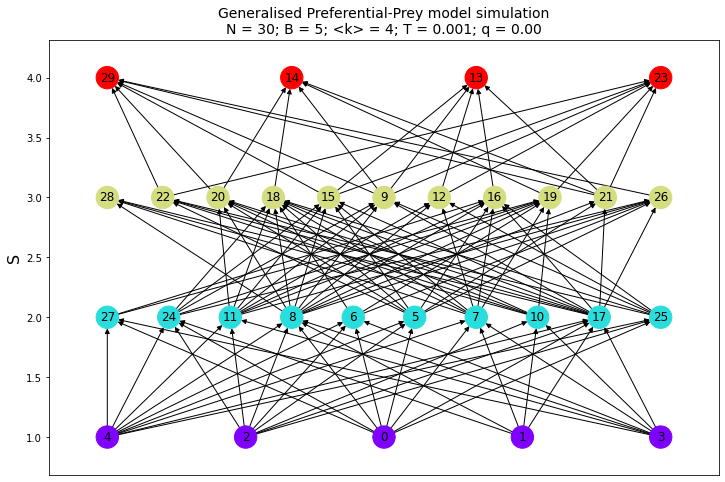

In [137]:
params = gen_ppm(30, 5, 4,0.001) #gen_ppm(N, B, avg_k, T)
plot_trophic_level_graph2(*params)

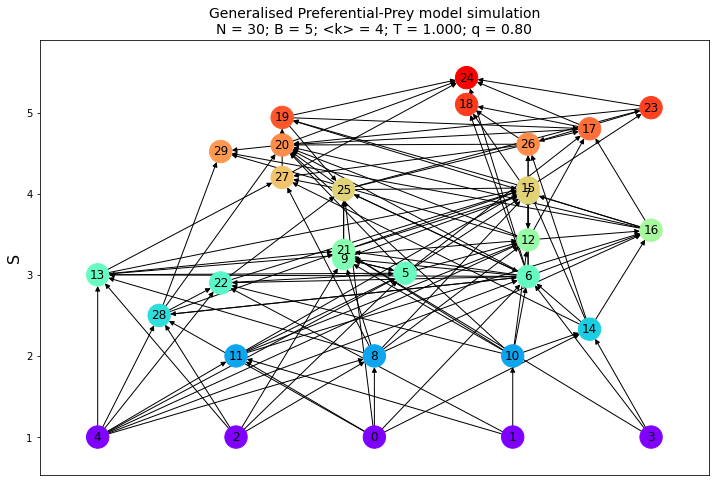

In [150]:
params = gen_ppm(30, 5, 4, 1) #gen_ppm(N, B, avg_k, T)
plot_trophic_level_graph2(*params)

# This below way of doing trophic level graph is the best

In [226]:

def trophic_level_graph(*params):
    G=params[0]
    N=params[1]
    B=params[2]
    avg_k=params[3]
    T=params[4]
    q=nx.trophic_incoherence_parameter(D)

    s = nx.trophic_levels(G)

    pos=graphviz_layout(G, prog='dot')

    #flipped_pos = {node: (x,-y) for (node, (x,y)) in pos.items()}
    # put s[node number ] to use S values instead of some other y values. 
    flipped_pos = {node: (x,s[node]) for (node, (x,y)) in pos.items()}

    fig, ax = plt.subplots(figsize=(12,8))
    #x=np.array(list(s.values()))
    #normalized = (x-min(x))/(max(x)-min(x))
    #nx.draw_networkx(G, flipped_pos,node_color=normalized,node_size=500,with_labels=True,cmap=plt.cm.rainbow,ax=ax)
    correct_s_for_G = [s[node] for node in G.nodes()]
    nx.set_node_attributes(G, correct_s_for_G,'s')
    nx.draw_networkx(G, flipped_pos,node_color= correct_s_for_G,vmin=min(list(s.values())),
                 vmax=max(list(s.values())),node_size=500,with_labels=True,cmap=plt.cm.rainbow,ax=ax)


    ax.tick_params(left=True, bottom=False, labelleft=True, labelbottom=False)
    ax.set_ylabel("S",size=16)
    ax.set_title("Generalised Preferential-Prey model simulation\nN = %d; B = %d; <k> = %d; T = %.3f; q = %.2f"%(N, B, avg_k, T,q),size=14)
    plt.savefig("ppm_T_"+str(T)+".png")
    plt.show()
            


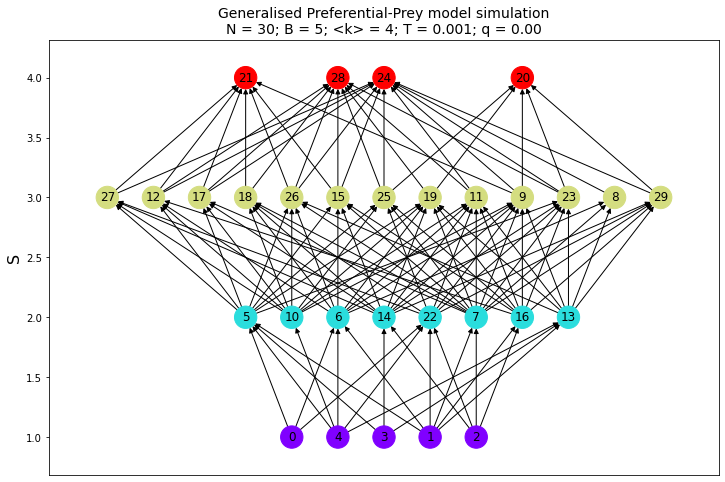

In [228]:
params = gen_ppm(30, 5, 4,0.001) #gen_ppm(N, B, avg_k, T)
trophic_level_graph(*params)

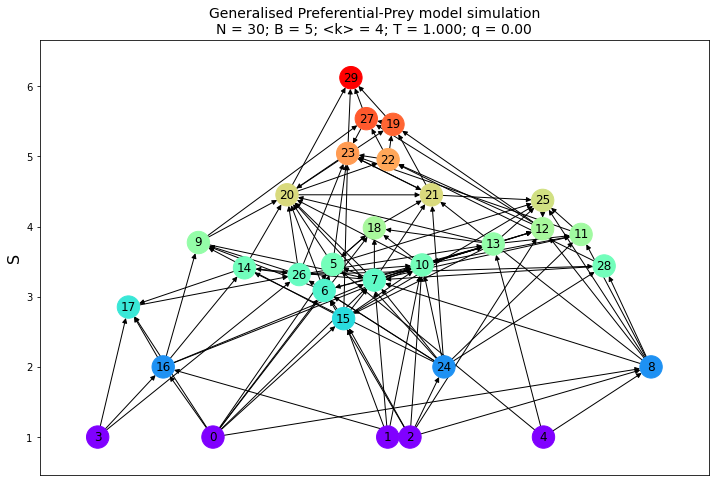

In [237]:
params = gen_ppm(30, 5, 4, 1) #gen_ppm(N, B, avg_k, T)
trophic_level_graph(*params)

# Plot some real food web network to understand what's happening

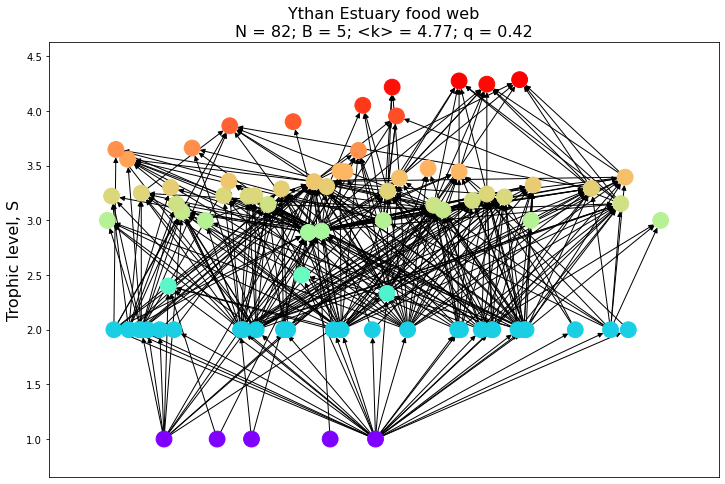

In [238]:
x = np.loadtxt("Network_Data_MJS20/FoodWebs/Ythan96.dat")
data = pd.DataFrame(x)
x = list(zip(data[1], data[0]))
G = nx.DiGraph(x)
G.remove_edges_from(nx.selfloop_edges(G))



N = G.number_of_nodes()

#number of basal nodes
B = 0


#Get the basal nodes (in degree = 0 )
in_degree = list(G.in_degree())
out_degree = list(G.out_degree())
    
#number of basal edges
basal_edges = []
for i in range(len(in_degree)):
    if in_degree[i][1] == 0:
        B += 1
        basal_edges.append(out_degree[i][1])

            
#average in-degree
avg_k = sum(d for n, d in G.in_degree()) / float(N)
        
    
q=nx.trophic_incoherence_parameter(G)

s = nx.trophic_levels(G)
# re-sort the nodes according to key values, i.e. min key value to max key value
#s = dict( sorted(s.items(), key=operator.itemgetter(0),reverse=False))
#sorted_s


pos=graphviz_layout(G, prog='dot')

#flipped_pos = {node: (x,-y) for (node, (x,y)) in pos.items()}
# put s[node number ] to use S values instead of some other y values. 


flipped_pos = {node: (x,s[node]) for (node, (x,y)) in pos.items()}

fig, ax = plt.subplots(figsize=(12,8))
#x=np.array(list(s.values()))
#normalized = (x-min(x))/(max(x)-min(x))
#nx.draw_networkx(G, flipped_pos,node_color= nx.set_node_attributes(G, list(s.values()),'s'),vmin=min(list(s.values())),
#                 vmax=max(list(s.values())),node_size=250,with_labels=False,cmap=plt.cm.rainbow,ax=ax)

correct_s_for_G = [s[node] for node in G.nodes()]
nx.set_node_attributes(G, correct_s_for_G,'s')
nx.draw_networkx(G, flipped_pos,node_color= correct_s_for_G,vmin=min(list(s.values())),
                 vmax=max(list(s.values())),node_size=250,with_labels=False,cmap=plt.cm.rainbow,ax=ax)

ax.tick_params(left=True, bottom=False, labelleft=True, labelbottom=False)
ax.set_ylabel("Trophic level, S",size=16)
ax.set_title("Ythan Estuary food web\nN = %d; B = %d; <k> = %.2f; q = %.2f"%(N, B, avg_k, q),size=16)
plt.savefig("Ythan.png")


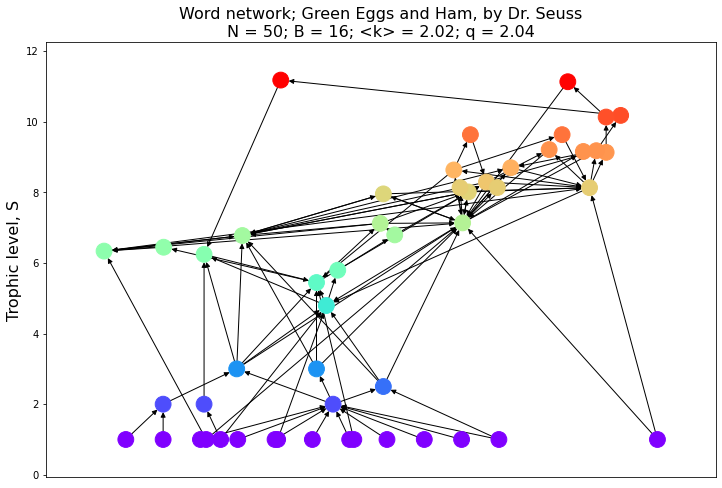

In [243]:
x = np.loadtxt("Network_Data_MJS20/Language/net_green_eggs.dat")
data = pd.DataFrame(x)
x = list(zip(data[1], data[0]))
G = nx.DiGraph(x)
G.remove_edges_from(nx.selfloop_edges(G))



N = G.number_of_nodes()

#number of basal nodes
B = 0


#Get the basal nodes (in degree = 0 )
in_degree = list(G.in_degree())
out_degree = list(G.out_degree())
    
#number of basal edges
basal_edges = []
for i in range(len(in_degree)):
    if in_degree[i][1] == 0:
        B += 1
        basal_edges.append(out_degree[i][1])

            
#average in-degree
avg_k = sum(d for n, d in G.in_degree()) / float(N)
        
    
q=nx.trophic_incoherence_parameter(G)

s = nx.trophic_levels(G)
# re-sort the nodes according to key values, i.e. min key value to max key value
#s = dict( sorted(s.items(), key=operator.itemgetter(0),reverse=False))
#sorted_s


pos=graphviz_layout(G, prog='dot')

#flipped_pos = {node: (x,-y) for (node, (x,y)) in pos.items()}
# put s[node number ] to use S values instead of some other y values. 


flipped_pos = {node: (x,s[node]) for (node, (x,y)) in pos.items()}

fig, ax = plt.subplots(figsize=(12,8))
#x=np.array(list(s.values()))
#normalized = (x-min(x))/(max(x)-min(x))
#nx.draw_networkx(G, flipped_pos,node_color= nx.set_node_attributes(G, list(s.values()),'s'),vmin=min(list(s.values())),
#                 vmax=max(list(s.values())),node_size=250,with_labels=False,cmap=plt.cm.rainbow,ax=ax)

correct_s_for_G = [s[node] for node in G.nodes()]
nx.set_node_attributes(G, correct_s_for_G,'s')
nx.draw_networkx(G, flipped_pos,node_color= correct_s_for_G,vmin=min(list(s.values())),
                 vmax=max(list(s.values())),node_size=250,with_labels=False,cmap=plt.cm.rainbow,ax=ax)

ax.tick_params(left=True, bottom=False, labelleft=True, labelbottom=False)
ax.set_ylabel("Trophic level, S",size=16)
ax.set_title("Word network; Green Eggs and Ham, by Dr. Seuss\nN = %d; B = %d; <k> = %.2f; q = %.2f"%(N, B, avg_k, q),size=16)
plt.savefig("word_network.png")
